INSERT DATA

In [94]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np



In [95]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv', 'train.csv'))

In [83]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


ANALYSIS

Distribution of Comment Labels

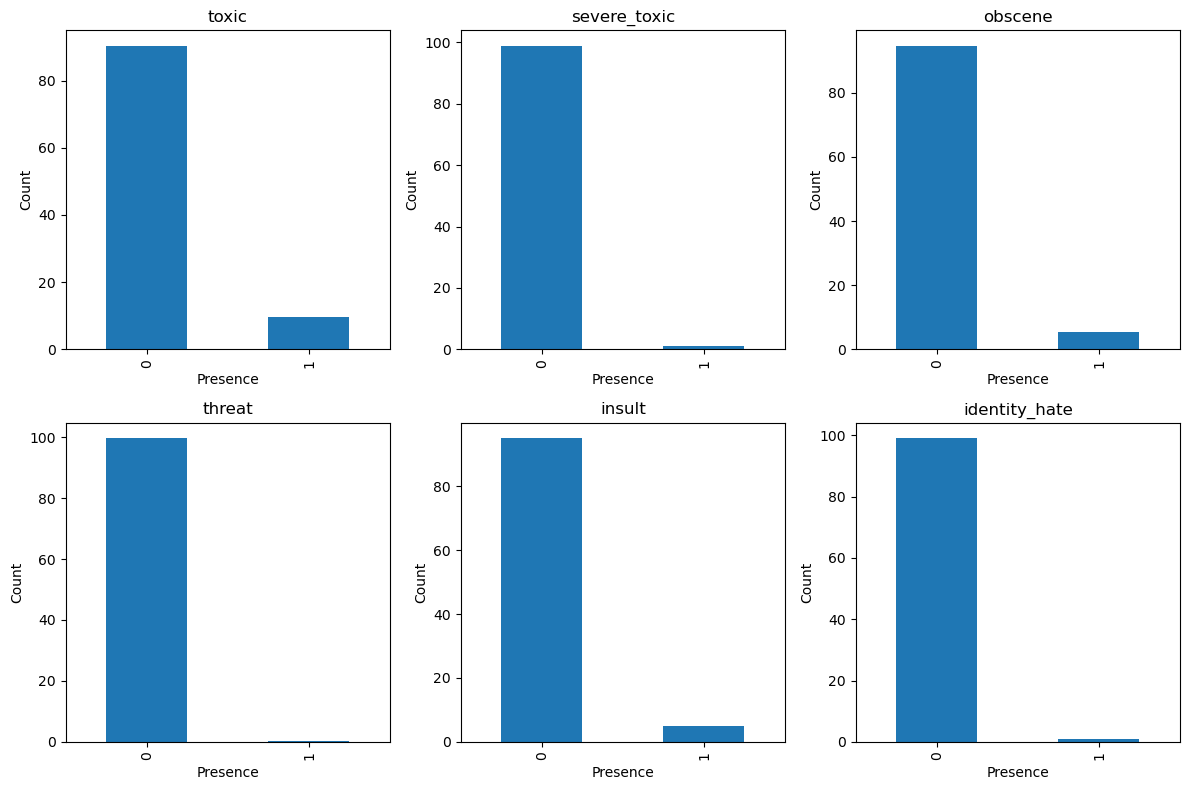

In [18]:
import matplotlib.pyplot as plt

labels = df[df.columns[2:]]

# Plot histogram
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    (df[label].value_counts(normalize=True) * 100).plot(kind='bar')
    plt.title(label)
    plt.xlabel('Presence')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


 Correlation Matrix

                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  


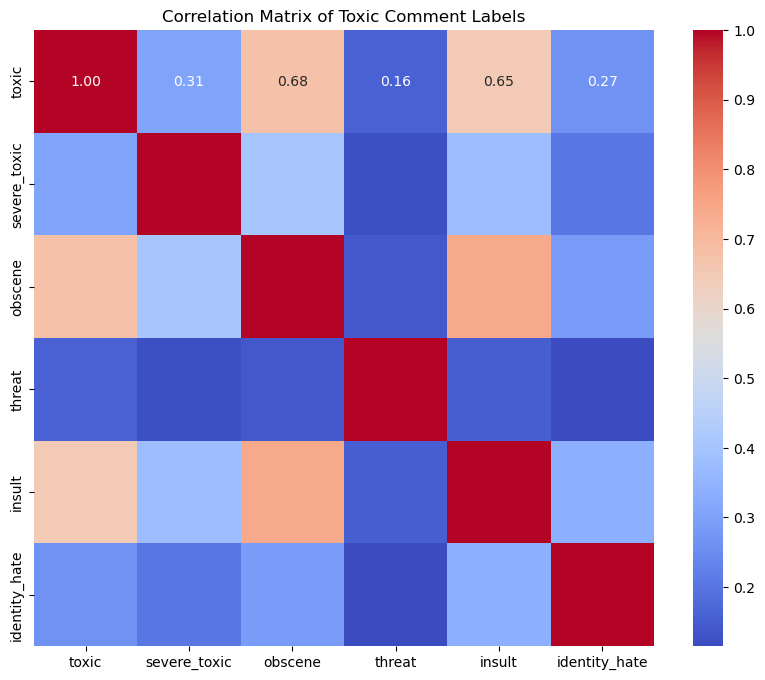

In [20]:
import seaborn as sns

# List of label columns in the dataset
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Select only the label columns
labels_df = df[label_columns]

# Calculate the correlation matrix for the label columns
correlation_matrix = labels_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Toxic Comment Labels')
plt.show()

In [81]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [11]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [66]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopwords removal to each comment in X
X_no_stopwords = X.apply(remove_stopwords)

PREPROCESS

get the tokens for the comments

In [67]:
from tensorflow.keras.layers import TextVectorization
# TextVectorization??

In [91]:
X = df['comment_text']
y = df[df.columns[2:]].values

Delete Stopwords

In [96]:
# Function to remove stopwords
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords set
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopwords removal to X (comment_text column)
X_no_stopwords = X.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Initialize TextVectorization layer
MAX_FEATURES = 200000  # Number of words in the vocabulary

In [89]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [97]:
vectorizer.adapt(X_no_stopwords.values)

# Vectorize the text data
vectorized_text = vectorizer(X_no_stopwords.values)

In [72]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'article',
 'page',
 'wikipedia',
 'talk',
 'please',
 'would',
 'one',
 'like',
 'see',
 'also',
 'think',
 'it',
 'im',
 'know',
 'people',
 'edit',
 'articles',
 'you',
 'use',
 'may',
 'time',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'information',
 'could',
 'well',
 'want',
 'sources',
 'way',
 'name',
 'deletion',
 'pages',
 'first',
 'help',
 'new',
 'editing',
 'source',
 'go',
 'need',
 'me',
 'say',
 'section',
 'edits',
 'thank',
 'user',
 'made',
 'many',
 'much',
 'really',
 'used',
 'here',
 'discussion',
 'find',
 'ive',
 'deleted',
 'fuck',
 'this',
 'work',
 'since',
 'point',
 'add',
 'look',
 'right',
 'read',
 'image',
 'take',
 'still',
 'someone',
 'two',
 'that',
 'back',
 'fact',
 'link',
 'said',
 'something',
 'going',
 'blocked',
 'list',
 'stop',
 'without',
 'content',
 'hi',
 'editors',
 'block',
 'thats',
 'us',
 'utc',
 'added',
 'history',
 'another',
 'removed',
 'might',
 'welcome',
 'note',
 'however',
 'sure',
 'place',
 'neve

In [13]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [105]:
# MCSHBAP = map, chache, shuffle, batch, prefetch from_tensor_slices, list_files
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(64)
dataset = dataset.prefetch(8)

In [99]:
batch_X, batch_y = dataset.as_numpy_iterator().next()
# len(dataset)
# int(len(dataset)*.7)

In [32]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [33]:
train_generator = train.as_numpy_iterator()
train_generator.next() 

(array([[  18,    7,   47, ...,    0,    0,    0],
        [  12,    9, 8062, ...,    0,    0,    0],
        [   8,  710,    6, ...,    0,    0,    0],
        ...,
        [  44,   33,   11, ...,    0,    0,    0],
        [5163,    9,  981, ...,    0,    0,    0],
        [2091,  850,  635, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0

SEQUENTIAL MODEL

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [110]:
model = Sequential()
model.add(Embedding(MAX_FEATURES + 1, 16))
model.add(Bidirectional(LSTM(16, activation='tanh')))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))


In [113]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [118]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 1800, 16)       │     3,200,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,625,892 (36.72 MB)

 Trainable params: 3,208,630 (12.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,417,262 (24.48 MB)

In [115]:
history = model.fit(train, epochs=1, validation_data=val, batch_size=32)

1745/1745 ━━━━━━━━━━━━━━━━━━━━ 1959s 1s/step - loss: 0.0557 - val_loss: 0.0497


In [116]:
history.history

{'loss': [0.05372796580195427], 'val_loss': [0.04970497265458107]}

<Figure size 800x500 with 0 Axes>

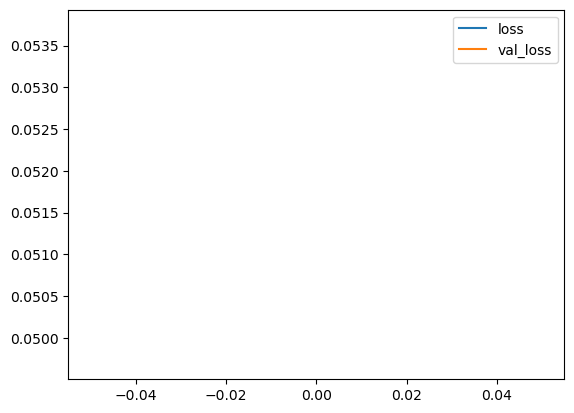

In [117]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

MAKE PREDICTIONS

In [126]:
input_text = vectorizer('You freaking suck! I am going to hit you.')
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  19, 7135,  306, ...,    0,    0,    0], dtype=int64)>

In [129]:
model.predict(np.expand_dims(input_text, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.0128214 , 0.00016586, 0.00576981, 0.00064099, 0.00424287,
        0.00220855]], dtype=float32)

In [135]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [136]:
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

In [130]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [131]:
(model.predict(batch_X) > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

In [137]:
res.shape

(1, 6)

EVALUATE MODEL

In [138]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [139]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [140]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [141]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.8639628291130066, Recall:0.5827870965003967, Accuracy:0.1726907640695572


TEST AND GRADIO

In [142]:
%pip install gradio jinja2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
     ---------------------------------------- 0.0/50.9 kB ? eta -:--:--
     ---------------------------------------- 50.9/50.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/109.4 kB ? eta -:--:--
     ----------------------------------- -- 102.4/109.4 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 109.4/109.4 kB 2.1 MB/s eta 0:00:00
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.3 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.3 MB 12.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/12.3 MB 17.5 MB/s eta 0:00:01
   -------------- ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.4 which is incompatible.


In [143]:
import tensorflow as tf
import gradio as gr

In [144]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5') #reload model

In [145]:
input_str = vectorizer('hey i freaken hate you!')

In [146]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [147]:
res

array([[1.61109562e-03, 3.09534335e-05, 1.14171731e-03, 1.13273265e-04,
        5.79241372e-04, 5.67456533e-04]], dtype=float32)

In [148]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text


In [153]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [154]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://14f862a89983758a03.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
